# Import libraries and dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os

# Import Data
data = pd.read_csv("/workspaces/bakery_sales_prediction/0_DataPreparation/features.csv")
pd.set_option('display.max_columns', None)
data.head()  # Print first few rows to verify

,id,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche,CPI,Unemployment,GDP,Wochentag,Wochenende,Monat,Schulferien,Temperatureclass_enc,Cloudclass_enc,Windclass_enc,Weather_After_Rain,Weather_Fog,Weather_Other,Weather_Rain,Weather_Showers_and_Thunderstorms,Weather_Snow_and_Ice,Group_brot,Group_brotchen,Group_croissant,Group_konditorei,Group_kuchen,Group_saisonbrot
0,1307011,2013-07-01,1,148.828353,6.0,17.8375,15.0,20.0,0,93.5,6.8,728.23,0,0,7,1,3,2,3,1,0,0,0,0,0,1,0,0,0,0,0
1,1307021,2013-07-02,1,159.793757,3.0,17.3125,10.0,NaN,0,93.5,6.8,728.23,1,0,7,1,3,2,3,0,0,1,0,0,0,1,0,0,0,0,0
2,1307031,2013-07-03,1,111.885594,7.0,21.0750,6.0,61.0,0,93.5,6.8,728.23,2,0,7,1,3,1,1,0,0,0,1,0,0,1,0,0,0,0,0
3,1307041,2013-07-04,1,168.864941,7.0,18.8500,7.0,20.0,0,93.5,6.8,728.23,3,0,7,1,3,1,1,1,0,0,0,0,0,1,0,0,0,0,0
4,1307051,2013-07-05,1,171.280754,5.0,19.9750,12.0,NaN,0,93.5,6.8,728.23,4,0,7,1,3,2,3,0,0,1,0,0,0,1,0,0,0,0,0


# Inspect data

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11164 entries, 0 to 11163
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 11164 non-null  int64  
 1   Datum                              11164 non-null  object 
 2   Warengruppe                        11164 non-null  int64  
 3   Umsatz                             9334 non-null   float64
 4   Bewoelkung                         11029 non-null  float64
 5   Temperatur                         11083 non-null  float64
 6   Windgeschwindigkeit                11083 non-null  float64
 7   Wettercode                         8502 non-null   float64
 8   KielerWoche                        11164 non-null  int64  
 9   CPI                                11164 non-null  float64
 10  Unemployment                       11164 non-null  float64
 11  GDP                                11164 non-null  flo

In [3]:
data.iloc[:,20:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11164 entries, 0 to 11163
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Weather_Fog                        11164 non-null  int64
 1   Weather_Other                      11164 non-null  int64
 2   Weather_Rain                       11164 non-null  int64
 3   Weather_Showers_and_Thunderstorms  11164 non-null  int64
 4   Weather_Snow_and_Ice               11164 non-null  int64
 5   Group_brot                         11164 non-null  int64
 6   Group_brotchen                     11164 non-null  int64
 7   Group_croissant                    11164 non-null  int64
 8   Group_konditorei                   11164 non-null  int64
 9   Group_kuchen                       11164 non-null  int64
 10  Group_saisonbrot                   11164 non-null  int64
dtypes: int64(11)
memory usage: 959.5 KB


In [4]:
numeric_features = ['Bewoelkung','Temperatur', 'Windgeschwindigkeit', 'CPI']
categorical_features = ['Warengruppe', 'KielerWoche', 'Wettercode', 'Wochentag', 'Monat', 'Schulferien', 'Temperatureclass_enc', 'Cloudclass_enc', 'Windclass_enc']

In [5]:
# Inspect data types and unique values for categorical columns
print(data[categorical_features].dtypes)
print("Unique Values:\n",data[categorical_features].apply(lambda x: x.unique()))


Warengruppe               int64
KielerWoche               int64
Wettercode              float64
Wochentag                 int64
Monat                     int64
Schulferien               int64
Temperatureclass_enc      int64
Cloudclass_enc            int64
Windclass_enc             int64
dtype: object
Unique Values:
 Warengruppe                                            [1, 2, 3, 4, 5, 6]
KielerWoche                                                        [0, 1]
Wettercode              [20.0, nan, 61.0, 5.0, 21.0, 65.0, 63.0, 95.0,...
Wochentag                                           [0, 1, 2, 3, 4, 5, 6]
Monat                             [7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6]
Schulferien                                                        [1, 0]
Temperatureclass_enc                                      [3, 4, 2, 1, 0]
Cloudclass_enc                                                  [2, 1, 0]
Windclass_enc                                                [3, 1, 2, 0]
dtype: object


In [6]:
# Ensure categorical columns are treated as categories
for col in categorical_features:
    data[col] = data[col].astype('category')

# Encode categorical variables using pd.get_dummies
features = pd.get_dummies(data[categorical_features], drop_first=False, dtype=int)

In [7]:
# Include any numeric columns that are not categorical
features[numeric_features] = data[numeric_features]

# Construct the prepared data set including the dependent variable ('label')
prepared_data = pd.concat([data[['id','Umsatz','Datum']], features], axis=1)

# Convert 'Datum' to datetime format
prepared_data['Datum'] = pd.to_datetime(prepared_data['Datum'], format='%Y-%m-%d')

# Handle missing values by removing rows with any missing values
prepared_data = prepared_data.dropna()

# Display the shape of the prepared data set
print(prepared_data.shape)

# Set id as index 
prepared_data.set_index('id', inplace=True)

# Display the first few rows of the prepared data set
prepared_data.head()

(9264, 72)


,Umsatz,Datum,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,KielerWoche_0,KielerWoche_1,Wettercode_0.0,Wettercode_3.0,Wettercode_5.0,Wettercode_10.0,Wettercode_17.0,Wettercode_20.0,Wettercode_21.0,Wettercode_22.0,Wettercode_28.0,Wettercode_45.0,Wettercode_49.0,Wettercode_53.0,Wettercode_55.0,Wettercode_61.0,Wettercode_63.0,Wettercode_65.0,Wettercode_68.0,Wettercode_69.0,Wettercode_71.0,Wettercode_73.0,Wettercode_75.0,Wettercode_77.0,Wettercode_79.0,Wettercode_95.0,Wochentag_0,Wochentag_1,Wochentag_2,Wochentag_3,Wochentag_4,Wochentag_5,Wochentag_6,Monat_1,Monat_2,Monat_3,Monat_4,Monat_5,Monat_6,Monat_7,Monat_8,Monat_9,Monat_10,Monat_11,Monat_12,Schulferien_0,Schulferien_1,Temperatureclass_enc_0,Temperatureclass_enc_1,Temperatureclass_enc_2,Temperatureclass_enc_3,Temperatureclass_enc_4,Cloudclass_enc_0,Cloudclass_enc_1,Cloudclass_enc_2,Windclass_enc_0,Windclass_enc_1,Windclass_enc_2,Windclass_enc_3,Bewoelkung,Temperatur,Windgeschwindigkeit,CPI
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1307011,148.828353,2013-07-01,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,6.0,17.8375,15.0,93.5
1307021,159.793757,2013-07-02,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,3.0,17.3125,10.0,93.5
1307031,111.885594,2013-07-03,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,7.0,21.0750,6.0,93.5
1307041,168.864941,2013-07-04,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,7.0,18.8500,7.0,93.5
1307051,171.280754,2013-07-05,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,5.0,19.9750,12.0,93.5


In [8]:
prepared_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9264 entries, 1307011 to 1712276
Data columns (total 71 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Umsatz                  9264 non-null   float64       
 1   Datum                   9264 non-null   datetime64[ns]
 2   Warengruppe_1           9264 non-null   int64         
 3   Warengruppe_2           9264 non-null   int64         
 4   Warengruppe_3           9264 non-null   int64         
 5   Warengruppe_4           9264 non-null   int64         
 6   Warengruppe_5           9264 non-null   int64         
 7   Warengruppe_6           9264 non-null   int64         
 8   KielerWoche_0           9264 non-null   int64         
 9   KielerWoche_1           9264 non-null   int64         
 10  Wettercode_0.0          9264 non-null   int64         
 11  Wettercode_3.0          9264 non-null   int64         
 12  Wettercode_5.0          9264 non-null   int6

# Split dataset

In [9]:
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'


train_data = prepared_data[prepared_data['Datum']<=train_end_date]
vali_data = prepared_data[(prepared_data['Datum']> train_end_date) & (prepared_data['Datum']<=validation_end_date)]
test_data = prepared_data[(prepared_data['Datum']> validation_end_date)]


In [10]:
# Separating features and labels
train_features = train_data.drop(columns=['Umsatz', 'Datum'])
training_features = train_data.drop(columns = ['Umsatz', 'Datum'], axis=1)
validation_features = vali_data.drop(columns = ['Umsatz', 'Datum'], axis=1)
test_features = test_data.drop(columns = ['Umsatz', 'Datum'], axis=1)


training_labels = train_data[['Umsatz']]
validation_labels = vali_data[['Umsatz']]
test_labels = test_data[['Umsatz']]

# Train neural network

In [11]:
# pip install --upgrade pip
# pip install tensorflow>=2.12.0 numpy>=1.21.0

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

2025-06-19 08:57:38.566435: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-19 08:57:38.568898: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-19 08:57:38.572583: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-19 08:57:38.586799: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750323458.604359   20993 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750323458.61

In [13]:
model = Sequential([
  InputLayer(shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(10, activation='relu'),
  Dense(4, activation='relu'),
  Dense(1, activation='relu')
])

model.summary()

2025-06-19 08:57:42.261665: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 69)             │           276 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 887 (3.46 KB)

 Non-trainable params: 138 (552.00 B)

In [14]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 64600.8438 - val_loss: 35478.1797
Epoch 2/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 33634.8125 - val_loss: 12576.5664
Epoch 3/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16227.7520 - val_loss: 10083.4551
Epoch 4/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11852.8057 - val_loss: 7909.8628
Epoch 5/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9579.1787 - val_loss: 6682.0615
Epoch 6/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8748.4688 - val_loss: 6155.1982
Epoch 7/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7071.0708 - val_loss: 5661.2808
Epoch 8/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6559.4741 - val_loss: 5198.5029
Epoch 9/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4985.8584 - val_loss: 5018.4795
Epoch 10/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6315.6641 - val_loss: 4724.0107
Epoch 11/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5416.9604 -

In [15]:
model.save("python_model.h5")

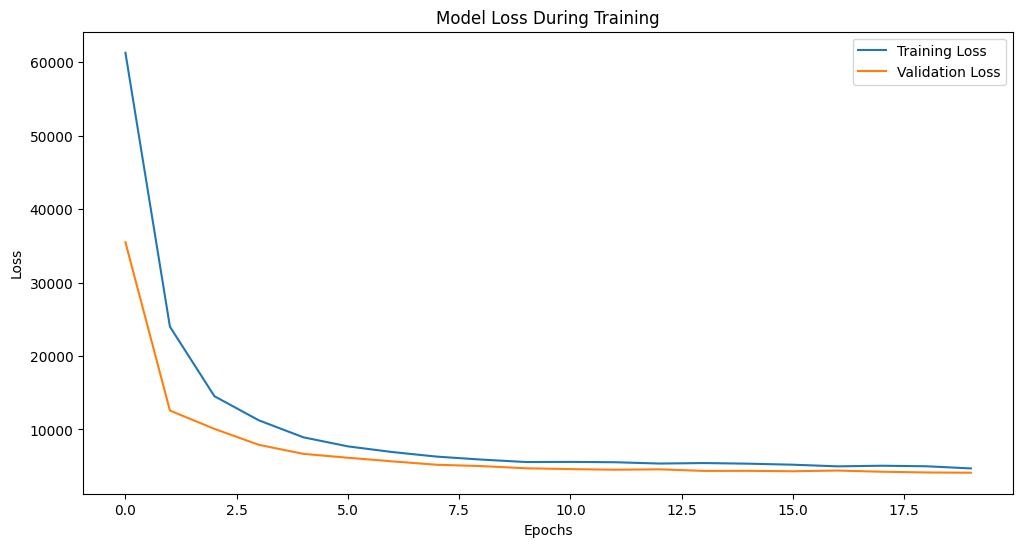

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [17]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)

print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")


234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MAPE on the Training Data: 24.66%
MAPE on the Validation Data: 24.07%


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


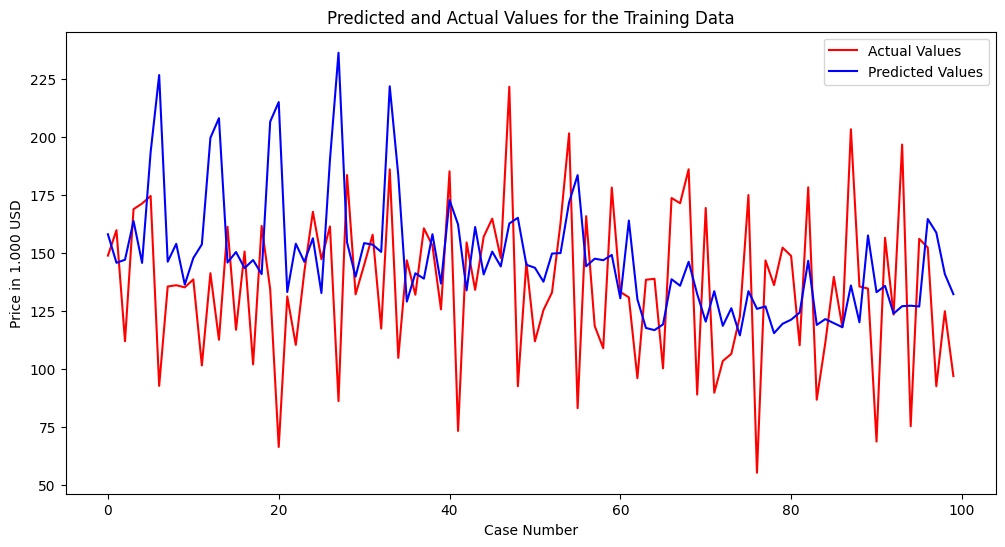

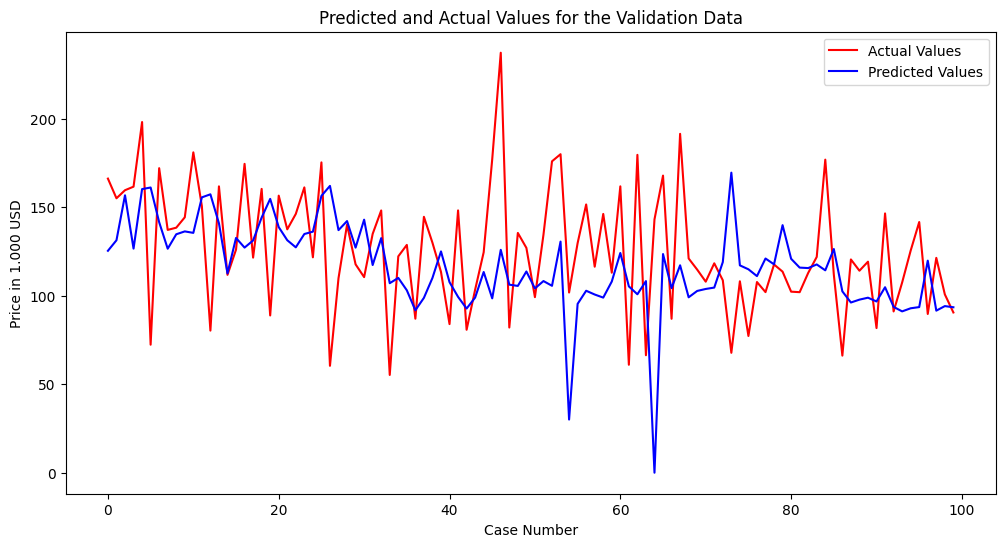

In [18]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Price in 1.000 USD')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
test_predictions = np.array(training_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')